# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data.Gender=='Male']
female_df =  data.loc[data.Gender=='Female']
print(f"Male Height mean: {male_df.Height.mean()}")
print(f"Male Height std dev: {male_df.Height.std()}")
print(f"Male Weight mean: {male_df.Weight.mean()}")
print(f"Male Weight std dev: {male_df.Weight.std()}")
print(f"Female Height mean: {female_df.Height.mean()}")
print(f"Female Height std dev: {female_df.Height.std()}")
print(f"Female Weight mean: {female_df.Weight.mean()}")
print(f"Female Weight std dev: {female_df.Weight.std()}")
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621737
Male Height std dev: 2.8633622286606517
Male Weight mean: 187.0206206581929
Male Weight std dev: 19.781154516763813
Female Height mean: 63.708773603424916
Female Height std dev: 2.696284015765056
Female Weight mean: 135.8600930074687
Female Weight std dev: 19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use bins = 10, set alpha level so that overlap can be visualized

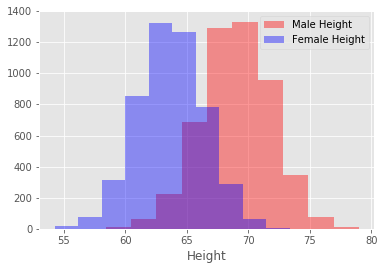

In [3]:
# Your code here
bin_number=10
sns.distplot(male_df.Height,color='red',label='Male Height',kde=False,bins=bin_number)
sns.distplot(female_df.Height,color='blue',label='Female Height',kde=False,bins=bin_number)
plt.legend();

#### Record your observations - are these inline with your personal observations?

The graph above shows that most men are taller than most women.  The mean height for men is higher than the mean height for women.  Both women and men have the same standard deviation of heights.  This matches up with my real-life observations.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

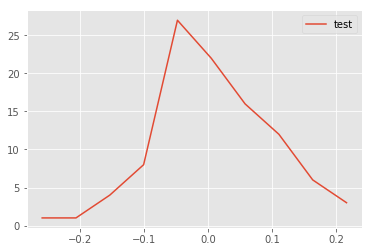

In [33]:
def density(x):
    n, bins = np.histogram(x, density=False)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

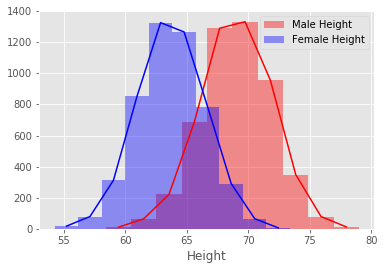

In [34]:
# You code here 
bin_number=10
sns.distplot(male_df.Height,color='red',label='Male Height',kde=False,bins=bin_number)
sns.distplot(female_df.Height,color='blue',label='Female Height',kde=False,bins=bin_number)
x,y = density(male_df.Height)
sns.lineplot(x,y,color='red')
m,n = density(female_df.Height)
sns.lineplot(m,n,color='blue')
plt.legend();

## Repeat above exercise for male and female weights

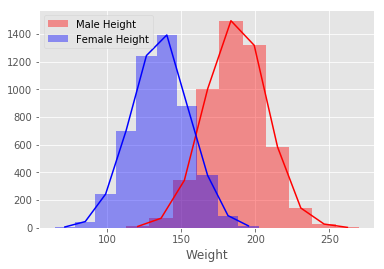

In [37]:
# Your code here 
sns.distplot(male_df.Weight,color='red',label='Male Height',kde=False,bins=bin_number)
sns.distplot(female_df.Weight,color='blue',label='Female Height',kde=False,bins=bin_number)
x,y = density(male_df.Weight)
sns.lineplot(x,y,color='red')
m,n = density(female_df.Weight)
sns.lineplot(m,n,color='blue')
plt.legend();

## Write your observations in the cell below

#### Record your observations - are these inline with your personal observations?
Most males weigh more than most females.  That matches up with my personal observations.

#### What is the takeaway when comparing male and female heights and weights?
That the average male is taller/heavier than the average female but there are a significant number of males that are shorter/lighter than a significant number of females.

## Repeat Above experiments in seaborn and compare with your results

In [ ]:
# Code for heights here
# I've already done this in seaborn so..

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.